<class 'pandas.core.frame.DataFrame'>
Float64Index: 6395 entries, 6.833333333333333 to 113.76666666666667
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process              6395 non-null   object 
 1   parent               6395 non-null   object 
 2   UID                  6395 non-null   int64  
 3   process_occurrences  6395 non-null   int64  
 4   fragmented           6395 non-null   int64  
 5   time_passed          6395 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 349.7+ KB


,process,parent,UID,process_occurrences,fragmented,time_passed
time_passed,,,,,,
6.833333,EMT-1(21817),nspr-2(16890),0,10,0,6.833333
6.866667,EMT-1(21817),nspr-2(16890),0,10,0,6.866667
6.900000,EMT-1(21817),nspr-2(16890),0,10,0,6.900000
6.933333,EMT-1(21817),nspr-2(16890),0,10,0,6.933333
6.966667,EMT-1(21817),nspr-2(16890),0,10,0,6.966667
...,...,...,...,...,...,...
113.700000,EMT-1(21817),nspr-2(16890),0,19,0,113.700000
113.733333,EMT-0(21817),nspr-2(16890),0,22,0,113.733333
113.733333,EMT-1(21817),nspr-2(16890),0,19,0,113.733333


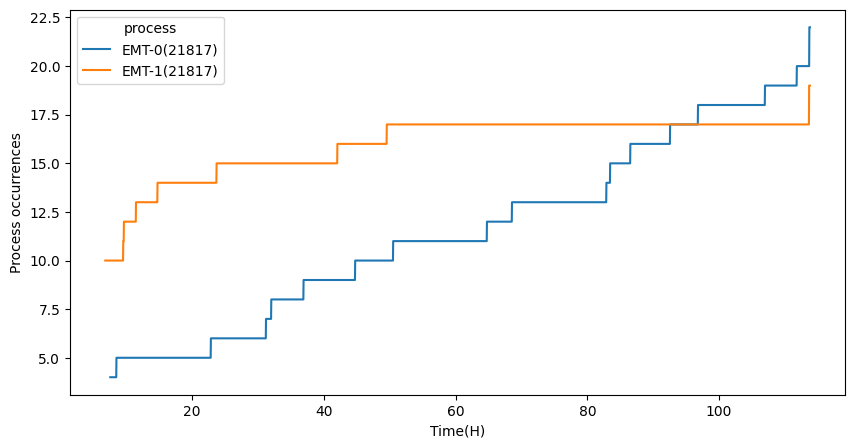

In [27]:
import pandas as pd

def ler_csv():
  return pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fragmentation.csv", delimiter=";")


""" Atribuir datetime64 para a coluna datetime do arquivo

    - transformar tipo datetime objeto para datetime64[ns]
"""
def converter_coluna_datetime_para_datetime64(data_frame):
  data_frame['datetime'] = pd.to_datetime(data_frame['datetime'])


def setar_index_como_datetime64(data_frame):
  return data_frame.set_index('datetime')


def total_segundos_inicial_final(data_frame):
  tempo_passado = (data_frame.index - data_frame.index[0]).total_seconds() / 3600

  data_frame['time_passed'] = tempo_passado

  return data_frame.set_index(data_frame['time_passed'])


def data_frame_filtrado(data_frame, ocorrencia_minima_processos):
  return data_frame[data_frame['process_occurrences'] >= ocorrencia_minima_processos]


def pivot_data_frame(data_frame_filtrado):
  data_frame_pivot = data_frame_filtrado.pivot(columns='process', values='process_occurrences')
  data_frame_pivot.plot(figsize=[10, 5], ylabel='Process occurrences', xlabel='Time(H)')


def informar_tipo_dados_data_frame(data_frame):
  data_frame.info()


data_frame = ler_csv()

converter_coluna_datetime_para_datetime64(data_frame)
data_frame = setar_index_como_datetime64(data_frame)

data_frame = total_segundos_inicial_final(data_frame)
data_frame = data_frame_filtrado(data_frame, 4)

pivot_data_frame(data_frame)
informar_tipo_dados_data_frame(data_frame)

data_frame